<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/01_tensorflow_NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##01. Neural Network Regression with TensorFlow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.linspace(-7.0, 14, 8)
y = np.linspace(3.0, 24, 8)

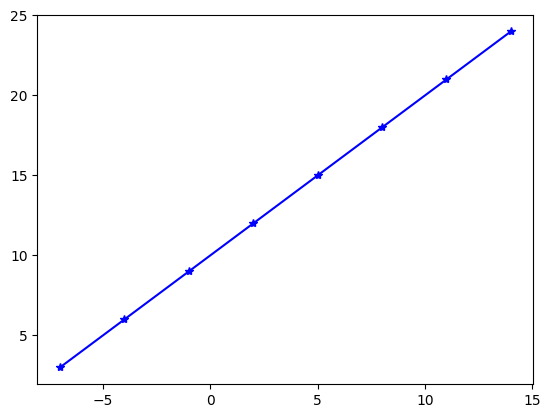

In [6]:
plt.plot(X,y, '*-b')

In [7]:
X = tf.constant(X)
y = tf.constant(y)

In [8]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

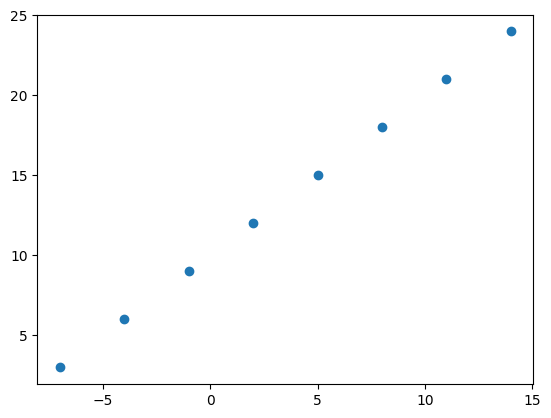

In [9]:
plt.scatter(X,y)

# Creating model with TensorFlow


*   Create model
*   Compile model
*   Fit model
*   Evaluate model





In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer = 'sgd', loss = tf.keras.losses.mse, metrics = 'mae')
model.fit(tf.expand_dims(X, -1), y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 169.3004 - mae: 12.2431
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 79.2280 - mae: 7.3164
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 73.5444 - mae: 7.7740
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 71.1144 - mae: 7.4560
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 68.8766 - mae: 7.3759
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 66.7135 - mae: 7.2518
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 64.6185 - mae: 7.1385
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 62.5893 - mae: 7.0252
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 60.6238 - mae: 6.9141
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 58.7200 - mae: 6.8046


1/1 [==============================] - 0s 65ms/step


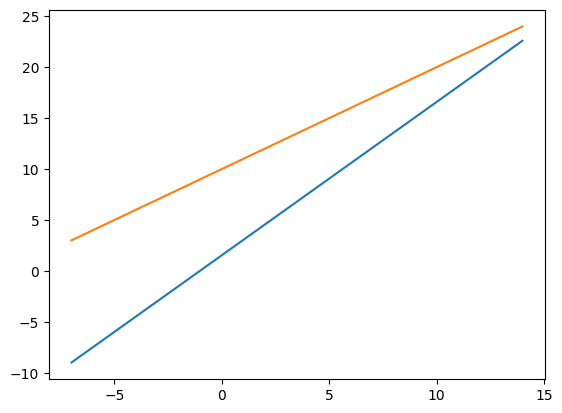

In [11]:
y_predict = model.predict(X)
plt.plot(X, y_predict)
plt.plot(X,y)

### Improving model:
**1. creting model** : change layrs, change number of neurons, chanhe activation function

**2. compile model** : change optimizer, change lerning rate, change loss function
**3. fit model** : change number of data, change number of epochs

In [12]:
tf.random.set_seed(42)
model_dif = tf.keras.Sequential((
  tf.keras.layers.Dense(50, 'relu'),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(50))
)
model_dif.add(tf.keras.layers.Dense(1))
model_dif.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.mae, metrics = 'mae')
history = model_dif.fit(tf.expand_dims(X, -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.6002 - mae: 11.6002
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 4.3962 - mae: 4.3962
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0508 - mae: 8.0508
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6147 - mae: 8.6147
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 5.9098 - mae: 5.9098
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 3.9809 - mae: 3.9809
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0226 - mae: 6.0226
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8025 - mae: 6.8025
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.4626 - mae: 6.4626
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.0093 - mae: 5.0093
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - los

1/1 [==============================] - 0s 75ms/step


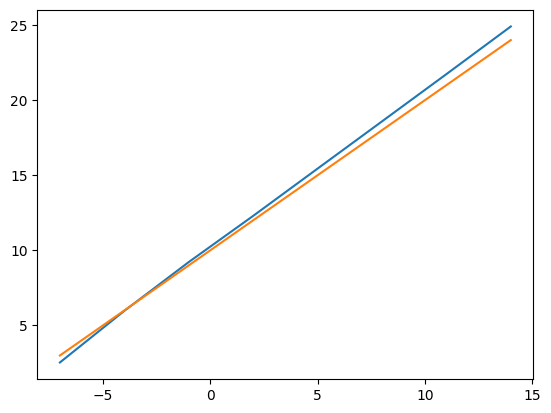

In [13]:
plt.plot(X, model_dif.predict(X))
plt.plot(X,y)
plt.show()

In [14]:
model_dif.predict(X)

1/1 [==============================] - 0s 32ms/step


array([[ 2.535883 ],
       [ 5.971757 ],
       [ 9.2206545],
       [12.294679 ],
       [15.442395 ],
       [18.586624 ],
       [21.733433 ],
       [24.906538 ]], dtype=float32)

In [15]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_dif.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


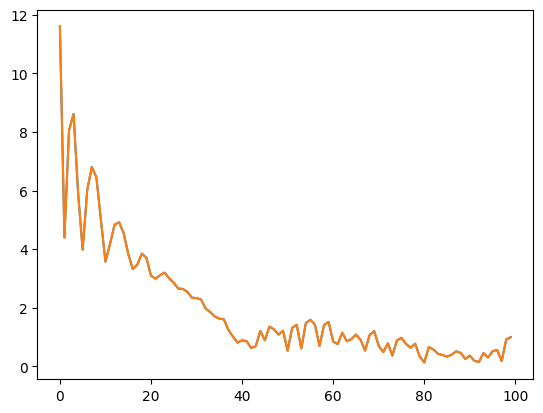

In [18]:
import pandas as pd
plt.plot(pd.DataFrame(history.history))

In [19]:
pd.DataFrame(history.history)

,loss,mae
0,11.600216,11.600216
1,4.396186,4.396186
2,8.050821,8.050821
3,8.614729,8.614729
4,5.909800,5.909800
...,...,...
95,0.513519,0.513519
96,0.560999,0.560999
97,0.183667,0.183667
98,0.919515,0.919515


## Plot of model


In [20]:
from keras.utils import plot_model

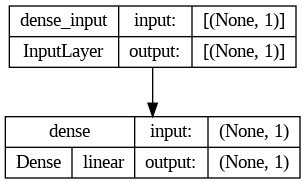

In [21]:
plot_model(model,show_shapes = True, show_layer_activations=True)

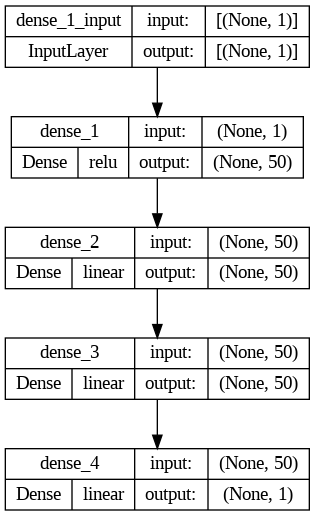

In [22]:
plot_model(model_dif,show_shapes = True, show_layer_activations=True)

1/1 [==============================] - 0s 37ms/step


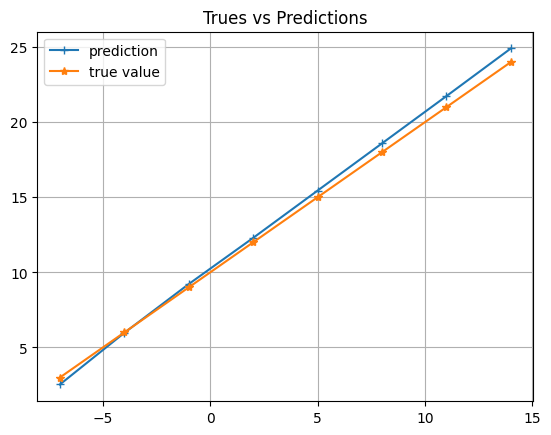

In [23]:
plt.plot(X, model_dif.predict(X), '+-', label = 'prediction')
plt.plot(X,y, '*-', label ='true value')
plt.title("Trues vs Predictions")
plt.grid(True)
plt.legend()
plt.show()

## Evaluate model
- MAE - mean absolute error (sensitive to outliers)
- MSE - mean squear error (not sensitive to outliers)
- Huber - combinations of mae, mse

In [24]:
from keras.metrics import mean_absolute_error
from keras.metrics import mean_squared_error
from keras.losses import Huber 

In [25]:
y_predict = model_dif.predict(X)

1/1 [==============================] - 0s 33ms/step


In [26]:
y_predict = tf.squeeze(y_predict)
y_predict

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 2.535883 ,  5.971757 ,  9.2206545, 12.294679 , 15.442395 ,
       18.586624 , 21.733433 , 24.906538 ], dtype=float32)>

In [27]:
# calulation mae
mean_absolute_error(y, y_predict)

<tf.Tensor: shape=(), dtype=float32, numpy=0.45958543>

In [28]:
# calulation mse
mse = mean_squared_error(y, y_predict)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.2814128>

In [29]:
# calculate huber metrics
huber = Huber()
huber(y, y_predict)

<tf.Tensor: shape=(), dtype=float32, numpy=0.1407064>

##Saving model
There two saving formats in TensorFlow we can use to save model:
1. SavedModel format
2. The HDF5 format

In [30]:
# save SaveModel format

model_dif.save("best_model_SaveModel_format")

In [31]:
# save model using HDF5 format
model_dif.save("best_model_HDF5_format.h5")

## Loading a saved model

In [32]:
# Loading a saved model SavedModel format
model_savedmodel = tf.keras.models.load_model('/content/best_model_SaveModel_format')


In [33]:
model_savedmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_hdf5 = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')

In [35]:
model_hdf5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [36]:
y2 = model_savedmodel.predict(X)

1/1 [==============================] - 0s 93ms/step


In [37]:
y3 = model_hdf5.predict(X)

1/1 [==============================] - 0s 91ms/step


In [38]:
y2==y3

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [39]:
tf.squeeze(y2) == y_predict

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Insurance data set and creating model for it

Get insurance data set and split data into x_train, y_traim, x_val, y_val

In [40]:
import pandas as pd

In [41]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [42]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
insurance.shape

(1338, 7)

In [44]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [46]:
data_insurance = pd.get_dummies(insurance)

In [47]:
X_data = data_insurance.loc[:, ~data_insurance.columns.isin(["charges"])]

In [48]:
X_data.shape
X_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [49]:
Y = data_insurance.charges

In [50]:
Y.shape

(1338,)

In [51]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [52]:
from  sklearn.model_selection import train_test_split

In [53]:
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(X_data, Y, test_size = 0.2, random_state = 42)

In [54]:
X_train.shape,y_train.shape

((1070, 11), (1070,))

In [55]:
X_val.shape,y_val.shape

((268, 11), (268,))

### Create a model and built

In [56]:
# Create a model
tf.random.set_seed(42)

In [57]:
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Input((11,)))
insurance_model.add(tf.keras.layers.Dense(100))
insurance_model.add(tf.keras.layers.Dense(100))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mae, metrics = ['mae'])
insurance_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = insurance_model.fit(X_train, y_train, epochs = 100, validation_data= (X_val, y_val))

Epoch 1/100
34/34 [==============================] - 2s 9ms/step - loss: 13181.0996 - mae: 13181.0996 - val_loss: 12556.1885 - val_mae: 12556.1885
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 12421.1592 - mae: 12421.1592 - val_loss: 11226.7705 - val_mae: 11226.7705
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 10364.9092 - mae: 10364.9092 - val_loss: 8607.7627 - val_mae: 8607.7627
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7885.4619 - mae: 7885.4619 - val_loss: 7657.2578 - val_mae: 7657.2578
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7484.5205 - mae: 7484.5205 - val_loss: 7610.7241 - val_mae: 7610.7241
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7442.4624 - mae: 7442.4624 - val_loss: 7563.7754 - val_mae: 7563.7754
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7393.6538 - mae: 7393.6538 - val_loss: 7510.1538 - val_mae:

<Axes: >

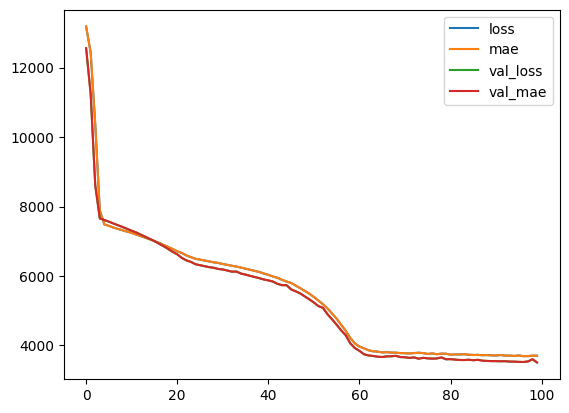

In [59]:
pd.DataFrame(history.history).plot()

In [60]:
insurance_model.evaluate(X_val, y_val)

9/9 [==============================] - 0s 2ms/step - loss: 3511.3101 - mae: 3511.3101


[3511.31005859375, 3511.31005859375]

### Improve the model

In [61]:
insurance_1 = tf.keras.Sequential()
insurance_1.add(tf.keras.layers.Input((11,)))
insurance_1.add(tf.keras.layers.Dense(100))
insurance_1.add(tf.keras.layers.Dense(100))
insurance_1.add(tf.keras.layers.Dense(1))

insurance_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.mae, metrics = ['mae'])
insurance_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1200      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [62]:
insurance_1.fit(X_train, y_train, epochs = 200, validation_data= (X_val, y_val))

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 13336.3574 - mae: 13336.3574 - val_loss: 12942.7471 - val_mae: 12942.7471
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13305.2471 - mae: 13305.2471 - val_loss: 12910.5557 - val_mae: 12910.5557
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13270.8955 - mae: 13270.8955 - val_loss: 12873.8770 - val_mae: 12873.8770
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13231.0664 - mae: 13231.0664 - val_loss: 12830.7959 - val_mae: 12830.7959
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13183.9229 - mae: 13183.9229 - val_loss: 12779.1562 - val_mae: 12779.1562
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13127.4062 - mae: 13127.4062 - val_loss: 12717.8438 - val_mae: 12717.8438
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 13060.1660 - mae: 13060.1660 - val_loss: 1264

In [63]:
insurance_1.evaluate(X_val, y_val)

9/9 [==============================] - 0s 3ms/step - loss: 6525.1294 - mae: 6525.1294


[6525.12939453125, 6525.12939453125]

In [64]:
insurance_model.evaluate(X_val, y_val)

9/9 [==============================] - 0s 2ms/step - loss: 3511.3101 - mae: 3511.3101


[3511.31005859375, 3511.31005859375]

### EarlyStopping Callback

### Scaling Features
**Normalization, Relugarization**

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
**Normalizing data** (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
**Standardization** (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
***With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1***(you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.*

In [65]:
X_data.shape

(1338, 11)

In [66]:
X_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<Axes: >

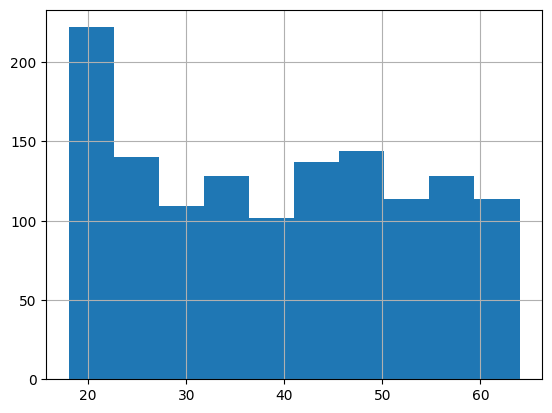

In [67]:
X_data.age.hist()

<Axes: >

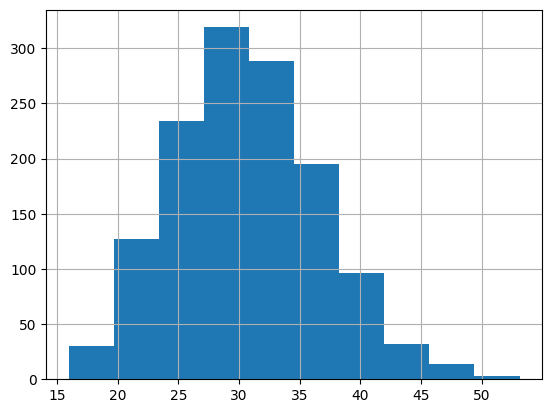

In [69]:
X_data.bmi.hist()

In [70]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [81]:
ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi','children']), remainder='passthrough')

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y, random_state= 42)

In [83]:
ct.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children'])])

In [84]:
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [85]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,24,23.655,0,0,1,1,0,0,1,0,0
1297,28,26.510,2,1,0,1,0,0,0,1,0
634,51,39.700,1,0,1,1,0,0,0,0,1
1022,47,36.080,1,0,1,0,1,0,0,1,0
178,46,28.900,2,1,0,1,0,0,0,0,1


In [86]:
x_train_normal[0]

array([0.13043478, 0.20702179, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [87]:
tf.random.set_seed(42)

In [95]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input((11,)))
model2.add(tf.keras.layers.Dense(100))
model2.add(tf.keras.layers.Dense(100))
model2.add(tf.keras.layers.Dense(1))

model2.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mae, metrics = ['mae'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               1200      
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(x_train_normal, y_train, epochs = 200)

In [92]:
insurance_model.evaluate(X_val, y_val)

9/9 [==============================] - 0s 6ms/step - loss: 3511.3101 - mae: 3511.3101


[3511.31005859375, 3511.31005859375]

In [97]:
model2.evaluate(x_test_normal, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 3254.1912 - mae: 3254.1912


[3254.191162109375, 3254.191162109375]